In [1]:
import pygrib
import netCDF4 as nc
import matplotlib.pyplot as plt 
import numpy as np
from windpowerlib import ModelChain, WindTurbine, create_power_curve
from windpowerlib import data as wt

import pandas as pd

In [2]:
gribfile = pygrib.open('20221026000000-0h-oper-fc.grib2')

for grb in gribfile:
    print(grb)
    print(grb.validDate)
    print(grb.name)
    print(grb.units)

1:Skin temperature:K (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202210260000
2022-10-26 00:00:00
Skin temperature
K
2:Soil Temperature:K (instant):regular_ll:depthBelowLandLayer:levels 0-0.07 m:fcst time 0 hrs:from 202210260000
2022-10-26 00:00:00
Soil Temperature
K
3:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 202210260000
2022-10-26 00:00:00
Geopotential Height
gpm
4:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 202210260000
2022-10-26 00:00:00
Geopotential Height
gpm
5:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 0 hrs:from 202210260000
2022-10-26 00:00:00
Relative humidity
%
6:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 202210260000
2022-10-26 00:00:00
Relative humidity
%
7:193:193 (accum):regular_ll:surface:level 0 -:fcst time 0 hrs (accum):from 202210260000
2022-10-26 00:00:00
unknown

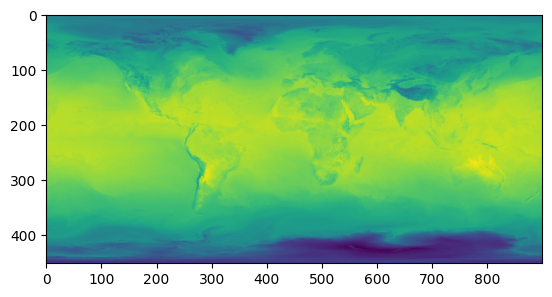

In [3]:
gribfile.seek(0)
temps = gribfile[31].values
plt.imshow(temps)

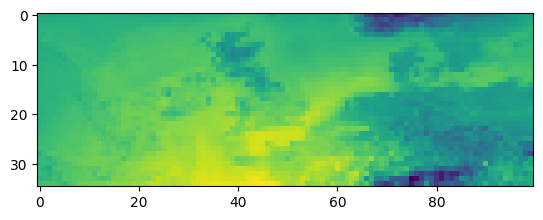

In [4]:
plt.imshow(temps[75:110,400:500])

In [5]:
noaa_weather_data = nc.Dataset('../gfs.t00z.atmanl.nc')

In [6]:
noaa_weather_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    hydrostatic: non-hydrostatic
    ncnsto: 9
    ak: [9.9900001e-01 1.6050000e+00 2.5320001e+00 3.9240000e+00 5.9759998e+00
 8.9469995e+00 1.3177000e+01 1.9096001e+01 2.7243000e+01 3.8276001e+01
 5.2984001e+01 7.2292999e+01 9.7268997e+01 1.2911000e+02 1.6913499e+02
 2.1876700e+02 2.7950601e+02 3.5289401e+02 4.4048099e+02 5.4378198e+02
 6.6423602e+02 8.0316400e+02 9.6173401e+02 1.1409310e+03 1.3415380e+03
 1.5641190e+03 1.8090280e+03 2.0764150e+03 2.3662520e+03 2.6783721e+03
 3.0125100e+03 3.3683630e+03 3.7456460e+03 4.1441641e+03 4.5638809e+03
 5.0049951e+03 5.4680171e+03 5.9538481e+03 6.4638638e+03 7.0000000e+03
 7.5634941e+03 8.1506611e+03 8.7565293e+03 9.3761406e+03 1.0004553e+04
 1.0636851e+04 1.1268157e+04 1.1893639e+04 1.2508519e+04 1.3108091e+04
 1.3687727e+04 1.4242890e+04 1.4769153e+04 1.5262202e+04 1.5717859e+04
 1.6132090e+04 1.6501018e+04 1.6820938e+04 1.7088324e+04 1.7299852e+04
 1.7453

In [7]:
for dim in noaa_weather_data.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'grid_xt', size = 3072
<class 'netCDF4._netCDF4.Dimension'>: name = 'grid_yt', size = 1536
<class 'netCDF4._netCDF4.Dimension'>: name = 'pfull', size = 127
<class 'netCDF4._netCDF4.Dimension'>: name = 'phalf', size = 128
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1


In [8]:
for var in noaa_weather_data.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 grid_xt(grid_xt)
    cartesian_axis: X
    long_name: T-cell longitude
    units: degrees_E
unlimited dimensions: 
current shape = (3072,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(grid_yt, grid_xt)
    long_name: T-cell longitude
    units: degrees_E
unlimited dimensions: 
current shape = (1536, 3072)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 grid_yt(grid_yt)
    cartesian_axis: Y
    long_name: T-cell latiitude
    units: degrees_N
unlimited dimensions: 
current shape = (1536,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(grid_yt, grid_xt)
    long_name: T-cell latitude
    units: degrees_N
unlimited dimensions: 
current shape = (1536, 3072)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 pfull

In [9]:
noaa_weather_data['ugrd']

<class 'netCDF4._netCDF4.Variable'>
float32 ugrd(time, pfull, grid_yt, grid_xt)
    long_name: zonal wind
    units: m/sec
    missing_value: -10000000000.0
    _FillValue: -10000000000.0
    cell_methods: time: point
    output_file: atm
    max_abs_compression_error: 0.005584717
    nbits: 14
unlimited dimensions: 
current shape = (1, 127, 1536, 3072)
filling on

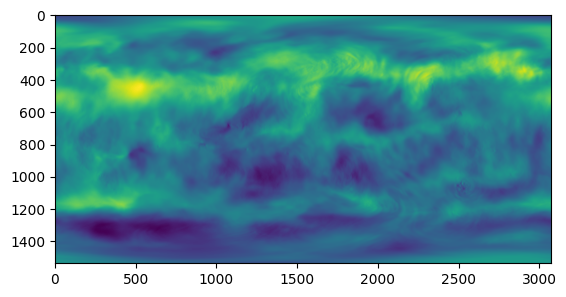

In [10]:
plt.imshow(noaa_weather_data['ugrd'][0,0,:,:])

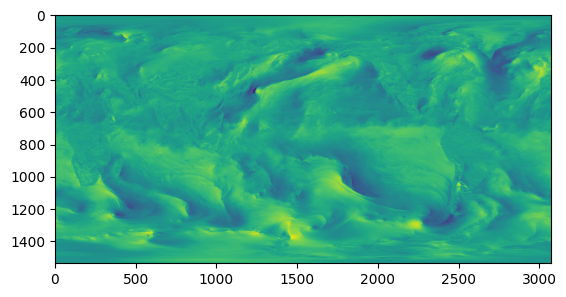

In [19]:
%matplotlib inline
plt.imshow(noaa_weather_data['vgrd'][0,126,:,:])

<IPython.core.display.Javascript object>


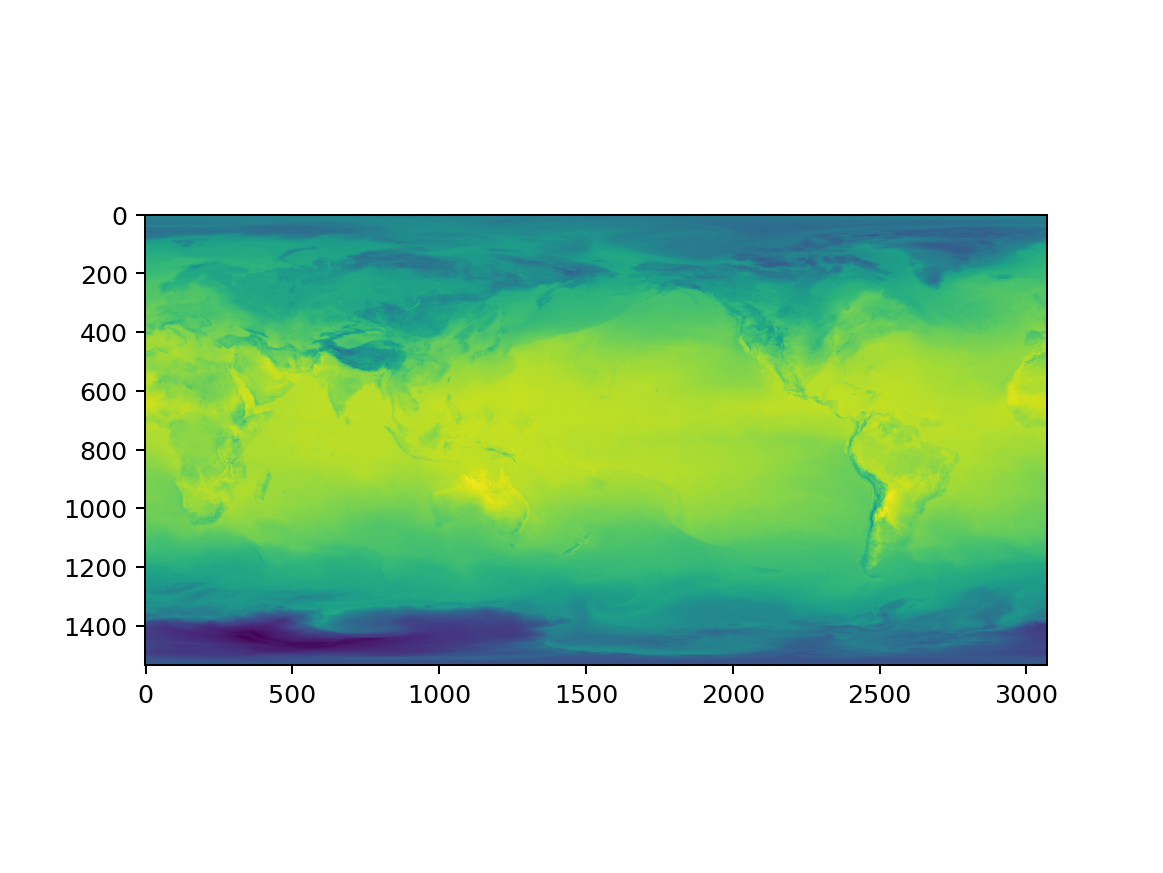

In [20]:
%matplotlib notebook
plt.imshow(noaa_weather_data['tmp'][0,126,:,:])

In [13]:
noaa_weather_data['tmp'][0,0,800,2500]

masked_array(data=174.93442,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [14]:
time = 0
plevel = 126
xlevel,ylevel = 3050, 303 

britain_data = {'tmp':None, 'ugrd':None, 'vgrd':None}



britain_data = {key:noaa_weather_data[key][time, plevel, ylevel, xlevel].data for key in britain_data.keys() if britain_data[key] is None}
britain_data['pressfc'] = noaa_weather_data['pressfc'][time, ylevel, xlevel].data
# britain_temp = noaa_weather_data['tmp'][time, plevel, ylevel, xlevel]
britain_data = {key:str(float(britain_data[key])) for key in britain_data.keys()}


britain_data['wind_speed'] = britain_data['ugrd']
britain_data['wind_speed'] = '5.32697'
del britain_data['ugrd']
del britain_data['vgrd']

britain_data['temperature'] = britain_data['tmp']
del britain_data['tmp']

britain_data['roughness_length'] = '0.15' # no idea what this means

britain_data['pressure'] = britain_data['pressfc']
del britain_data['pressfc']

britain_data['variable_name'] = '2022-10-26'


import io


file = io.BytesIO()
file.write(bytes(','.join(list(britain_data.keys())[::-1]), encoding='ascii'))
file.write(b'\n')
file.write(b'height,0,0,0,10\n')
file.write(bytes(','.join(list(britain_data.values())[::-1]), encoding='ascii'))
# file.write(britain_data.values[::-1])


file.seek(0)
# print('\n'.join(f'{i.strip()}' for i in file.readlines()))

      
britain_data = pd.read_csv(file, 
        index_col=0,
        header=[0, 1],
        date_parser=lambda idx: pd.to_datetime(idx, utc=True))

In [15]:
enercon_e126 = {
        'turbine_type': 'E-126/4200',  # turbine type as in oedb turbine library
        'hub_height': 135  # in m
    }
# initialize WindTurbine object
e126 = WindTurbine(**enercon_e126)

mc_e126 = ModelChain(e126, wind_speed_model='hellman').run_model(
    britain_data)
# write power output time series to WindTurbine object
e126.power_output = mc_e126.power_output

In [16]:
e126.power_output

2022-10-26 00:00:00+00:00    1.677860e+06
Name: feedin_power_plant, dtype: float64

In [17]:
from requests import get

result = get('https://openenergy-platform.org/api/v0/schema/supply/tables/wind_turbine_library/rows')
for row in result.json():
  # Process the row
  print(row)

{'id': 0, 'turbine_id': 1, 'manufacturer': 'Enercon', 'name': 'E-141/4200 EP 4', 'turbine_type': 'E-141/4200', 'nominal_power': 4200, 'rotor_diameter': '141', 'rotor_area': '15613', 'hub_height': '99; 129; 135; 159', 'max_speed_drive': '11.0', 'wind_class_iec': 'IEC/EN IIA', 'wind_zone_dibt': 'WZ3 GK I; WZ3 GK I', 'power_density': '269.0', 'power_density_2': '3.7', 'calculated': True, 'has_power_curve': True, 'power_curve_wind_speeds': '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]', 'power_curve_values': '[0.0, 22.0, 104.0, 260.0, 523.0, 920.0, 1471.0, 2151.0, 2867.0, 3481.0, 3903.0, 4119.0, 4196.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0]', 'has_cp_curve': True, 'power_coefficient_curve_wind_speeds': '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 